In [1]:
import os
os.chdir('..')

In [2]:
from utils.constants import DatasetType, DAY_IN_SEC
from utils.preprocessing import datetime_index_to_ints
from typing import Literal
import pandas as pd
from pandas import HDFStore
from nilmtk import DataSet
import matplotlib.pyplot as plt
import numpy as np
import random

HOUR_IN_SEC = 60 * 60
MAX_PLOT_LEN = 24

In [3]:
def plot_hours(data: pd.Series, hours: int = 1, start: int = 0, plot_title=None):
    short_data = data[HOUR_IN_SEC * start: HOUR_IN_SEC * (hours + start)]
    int_dates = datetime_index_to_ints(short_data.index)
    int_dates -= int_dates[0]
    short_data = short_data.set_axis(int_dates)
    day_data = short_data.reindex(range(DAY_IN_SEC * hours))
    
    plt.figure(figsize=(10, 4))
    plt.title(plot_title)
    plt.xlim(left=0, right=hours)
    plt.ylim(top=1000)
    plt.xlabel('часы')
    plt.ylabel('потребляемая мощность')
    plt.plot(day_data.index / 3600, day_data.values, linewidth=1)
    plt.show()
    

def plot_random(nilmtk_data, keys: list, ds_name):
    key = random.choice(keys)
    elec = nilmtk_data.buildings[key].elec
    data = elec.mains().power_series_all_data()
    est_hours_len = len(data) // 3600
    start = random.randint(0, est_hours_len - MAX_PLOT_LEN)
    hours = random.randint(1, MAX_PLOT_LEN)
    plot_title = f'{ds_name}, building_{key}, сдвиг от начала на {start//24}д{start%24}ч'
    plot_hours(data, hours, start, plot_title)
    

In [151]:
ds = DatasetType.IDEAL
nilmtk_data = DataSet(ds.nilmtk_path())
keys = nilmtk_data.buildings.keys()
keys = list(keys)

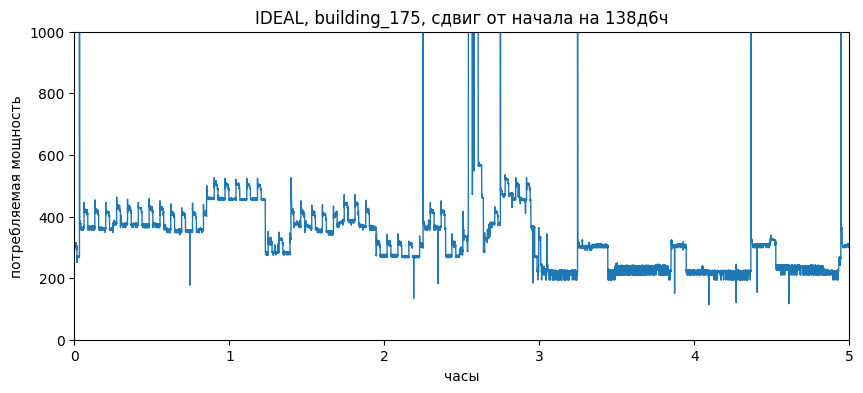

In [128]:
plot_random(nilmtk_data, keys, ds.name)

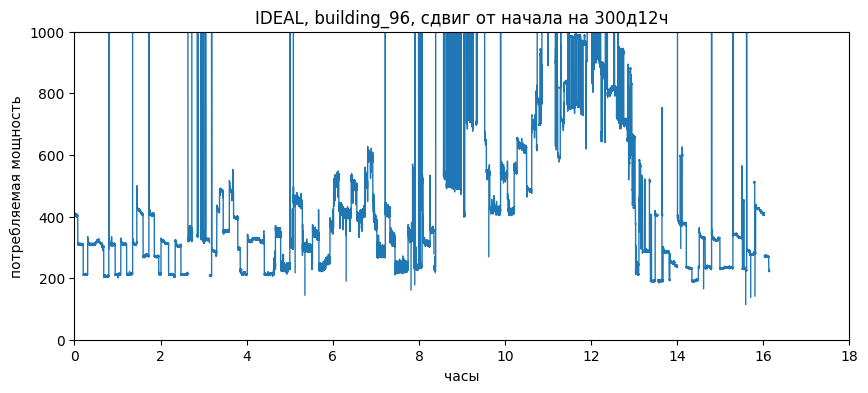

In [138]:
plot_random(nilmtk_data, keys, ds.name)

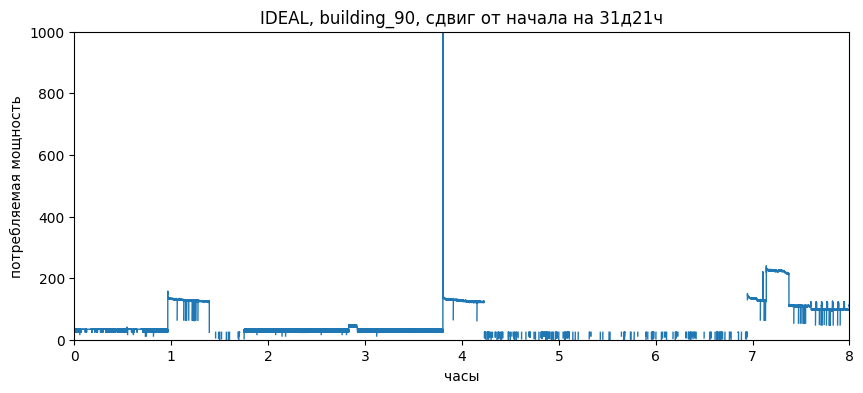

In [152]:
plot_random(nilmtk_data, keys, ds.name)

In [153]:
nilmtk_data.store.close()

In [4]:
ds = DatasetType.REDD
nilmtk_data = DataSet(ds.nilmtk_path())
keys = nilmtk_data.buildings.keys()
keys = list(keys)

Loading data for meter ElecMeterID(instance=2, building=1, dataset='REDD')     
Done loading data all meters for this chunk.


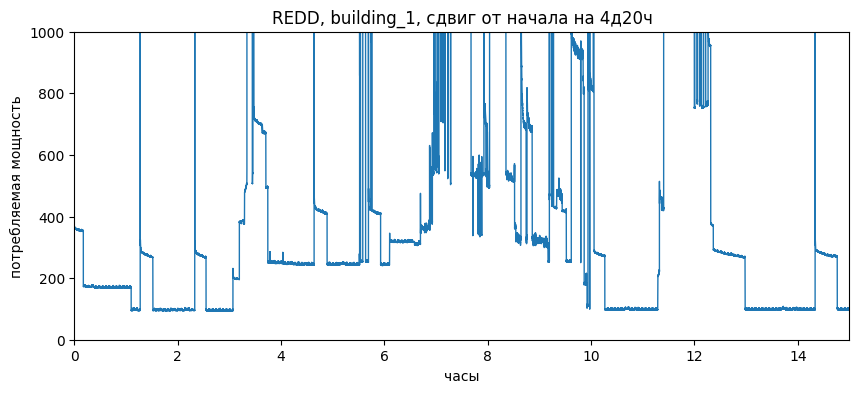

In [17]:
plot_random(nilmtk_data, keys, ds.name)

Loading data for meter ElecMeterID(instance=2, building=1, dataset='REDD')     
Done loading data all meters for this chunk.


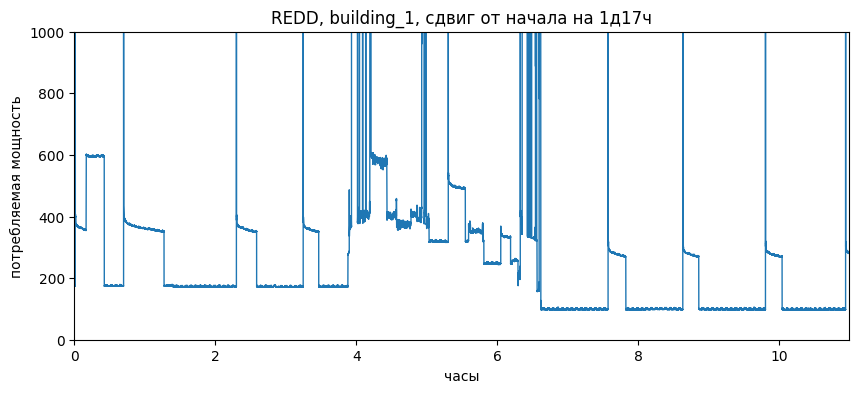

In [6]:
plot_random(nilmtk_data, keys, ds.name)

Loading data for meter ElecMeterID(instance=2, building=3, dataset='REDD')     
Done loading data all meters for this chunk.


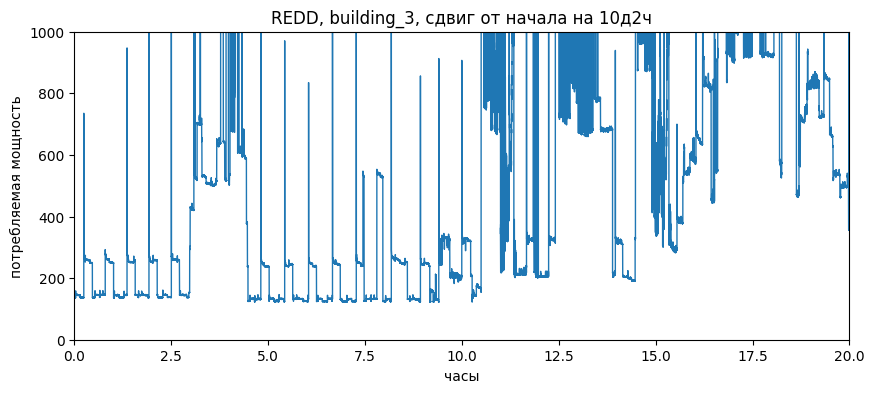

In [11]:
plot_random(nilmtk_data, keys, ds.name)

In [ ]:
nilmtk_data.store.close()